# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from pybaseball import pitching_stats

In [7]:
# Batting Stats , qual is the number of players appearences 
#pitching = pitching_stats(2007,2022, qual=50)
#pitching

In [ ]:
# Export DataFrame to csv
#pitching.to_csv('../static/data/Raw_Data/pitching.csv', index=False)

In [38]:
#Load data from 2007 till 2022
pitching= pd.read_csv("../static/data/Raw_Data/pitching.csv")
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
0,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,11.1,20,0.039,112.9,148,0.287,515,0.164,0.315,NaN
1,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,0,NaN,NaN,0,NaN,0,0.185,0.294,NaN
2,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,0,NaN,NaN,0,NaN,0,0.187,0.287,NaN
3,2036,2015,Clayton Kershaw,LAD,27,16,7,8.6,2.13,33,...,8.9,15,0.028,113.3,132,0.244,542,0.164,0.323,NaN
4,8700,2009,Justin Verlander,DET,26,19,9,8.4,3.45,35,...,NaN,0,NaN,NaN,0,NaN,0,0.175,0.289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2072,2013,Jeremy Guthrie,KCR,34,15,12,0.6,4.04,33,...,NaN,0,NaN,NaN,0,NaN,0,0.185,0.236,NaN
387,3551,2012,Clayton Richard,SDP,28,14,14,0.4,3.99,33,...,NaN,0,NaN,NaN,0,NaN,0,0.183,0.246,NaN
388,4366,2011,Joe Saunders,ARI,30,12,13,0.3,3.69,33,...,NaN,0,NaN,NaN,0,NaN,0,0.169,0.231,NaN
389,1116,2007,Livan Hernandez,ARI,32,11,11,0.2,4.93,33,...,NaN,0,NaN,NaN,0,NaN,0,0.185,0.239,NaN


In [39]:
# Group by player ID and drop players with only 1 season of data 
# Leave players with a t least 2 seasons of data
pitching = pitching.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0]>1)

In [40]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
0,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,11.1,20,0.039,112.9,148,0.287,515,0.164,0.315,NaN
1,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,0,NaN,NaN,0,NaN,0,0.185,0.294,NaN
2,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,0,NaN,NaN,0,NaN,0,0.187,0.287,NaN
3,2036,2015,Clayton Kershaw,LAD,27,16,7,8.6,2.13,33,...,8.9,15,0.028,113.3,132,0.244,542,0.164,0.323,NaN
4,8700,2009,Justin Verlander,DET,26,19,9,8.4,3.45,35,...,NaN,0,NaN,NaN,0,NaN,0,0.175,0.289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,976,2010,Randy Wolf,MIL,33,13,12,0.8,4.17,34,...,NaN,0,NaN,NaN,0,NaN,0,0.181,0.248,NaN
386,2072,2013,Jeremy Guthrie,KCR,34,15,12,0.6,4.04,33,...,NaN,0,NaN,NaN,0,NaN,0,0.185,0.236,NaN
387,3551,2012,Clayton Richard,SDP,28,14,14,0.4,3.99,33,...,NaN,0,NaN,NaN,0,NaN,0,0.183,0.246,NaN
388,4366,2011,Joe Saunders,ARI,30,12,13,0.3,3.69,33,...,NaN,0,NaN,NaN,0,NaN,0,0.169,0.231,NaN


In [41]:
# Write a function that takes WAR number from a player's season to insert in Next_WAR column
def next_season(player):
    player = player.sort_values("Season")
    player["Next_WAR"] = player["WAR"].shift(-1)
    return player

pitching = pitching.groupby("IDfg", group_keys=False).apply(next_season)

In [42]:
# Show the next WAR of each player in a DF 
# Missing values are for some seasons with no data (some players could not play in these seasons)
war_df=pitching[['Name','Season','WAR','Next_WAR']]
war_df

,Name,Season,WAR,Next_WAR
259,Mark Buehrle,2007,3.3,4.2
171,Mark Buehrle,2008,4.2,3.0
279,Mark Buehrle,2009,3.0,3.8
201,Mark Buehrle,2010,3.8,3.1
275,Mark Buehrle,2011,3.1,1.6
...,...,...,...,...
39,Aaron Nola,2022,6.3,NaN
164,Sandy Alcantara,2021,4.3,5.7
57,Sandy Alcantara,2022,5.7,NaN
72,Shane Bieber,2019,5.5,4.9


## Cleaning Data

In [43]:
# Check null values
null_data=pitching.isnull().sum()
null_data

IDfg          0
Season        0
Name          0
Team          0
Age           0
           ... 
Events        0
CStr%         0
CSW%          0
xERA        326
Next_WAR     91
Length: 335, dtype: int64

In [44]:
# List columns with no missing values 
complete_cols=list(pitching.columns[null_data == 0])

In [54]:
# Create a clean DataFrame with complete columns and Next_WAR column
clean_pitching = pitching[complete_cols + ["Next_WAR"]].copy()
clean_pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Oppo%+,Soft%+,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,Next_WAR
259,225,2007,Mark Buehrle,CHW,28,10,9,3.3,3.63,30,...,81,111,100,94,0,0,0,0.171,0.250,4.2
171,225,2008,Mark Buehrle,CHW,29,15,12,4.2,3.79,34,...,83,115,100,91,0,0,0,0.171,0.239,3.0
279,225,2009,Mark Buehrle,CHW,30,13,10,3.0,3.84,33,...,95,98,109,81,0,0,0,0.176,0.242,3.8
201,225,2010,Mark Buehrle,CHW,31,13,13,3.8,4.28,33,...,100,124,99,87,0,0,0,0.181,0.242,3.1
275,225,2011,Mark Buehrle,CHW,32,13,9,3.1,3.59,31,...,85,115,95,97,0,0,0,0.179,0.244,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,16149,2022,Aaron Nola,PHI,29,11,13,6.3,3.25,32,...,104,103,100,98,38,169,534,0.197,0.324,NaN
164,18684,2021,Sandy Alcantara,MIA,25,9,15,4.3,3.19,33,...,91,116,100,91,35,227,576,0.146,0.279,5.7
57,18684,2022,Sandy Alcantara,MIA,26,14,9,5.7,2.28,32,...,93,126,99,87,32,239,620,0.153,0.275,NaN
72,19427,2019,Shane Bieber,CLE,24,15,8,5.5,3.28,34,...,104,79,97,112,41,231,554,0.185,0.325,4.9


### Drop and Dummify all of the categorical variables 

In [55]:
#Check columns types 
clean_pitching.dtypes

IDfg          int64
Season        int64
Name         object
Team         object
Age           int64
             ...   
HardHit       int64
Events        int64
CStr%       float64
CSW%        float64
Next_WAR    float64
Length: 155, dtype: object

In [56]:
# Find columns with object data type
clean_pitching.dtypes[clean_pitching.dtypes == 'object']

Name       object
Team       object
Dollars    object
Age Rng    object
dtype: object

In [57]:
# Drop 'Dollars' (Dollar value of player) and 'Age Rng' (Player's age range during a season) 
clean_pitching = clean_pitching.drop(['Dollars','Age Rng'], axis = 1, inplace = False)

In [58]:
# Assign each team name to number 
clean_pitching["Team_code"] = clean_pitching["Team"].astype("category").cat.codes

In [61]:
# Copy pitching data 
clean_pitching = clean_pitching.copy()

# Drop Nan Values from 'Next_Raw'
clean_pitching = clean_pitching.dropna().copy()

In [62]:
clean_pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Soft%+,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,Next_WAR,Team_code
259,225,2007,Mark Buehrle,CHW,28,10,9,3.3,3.63,30,...,111,100,94,0,0,0,0.171,0.250,4.2,6
171,225,2008,Mark Buehrle,CHW,29,15,12,4.2,3.79,34,...,115,100,91,0,0,0,0.171,0.239,3.0,6
279,225,2009,Mark Buehrle,CHW,30,13,10,3.0,3.84,33,...,98,109,81,0,0,0,0.176,0.242,3.8,6
201,225,2010,Mark Buehrle,CHW,31,13,13,3.8,4.28,33,...,124,99,87,0,0,0,0.181,0.242,3.1,6
275,225,2011,Mark Buehrle,CHW,32,13,9,3.1,3.59,31,...,115,95,97,0,0,0,0.179,0.244,1.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,13431,2016,Marcus Stroman,TOR,25,9,10,3.3,4.37,32,...,98,100,101,28,264,631,0.172,0.264,3.4,31
69,16149,2018,Aaron Nola,PHI,25,17,6,5.5,2.37,33,...,122,113,71,21,168,542,0.198,0.322,3.4,22
240,16149,2019,Aaron Nola,PHI,26,12,7,3.4,3.87,34,...,92,95,110,34,210,532,0.206,0.315,6.3,22
164,18684,2021,Sandy Alcantara,MIA,25,9,15,4.3,3.19,33,...,116,100,91,35,227,576,0.146,0.279,5.7,16


In [63]:
# Remove some columns 
removed_columns = ["Next_WAR", "Name", "Team", "IDfg", "Season"]
selected_columns = clean_pitching.columns[~clean_pitching.columns.isin(removed_columns)]

In [64]:
# All columns except the one we have removed 
selected_columns

Index(['Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV',
       ...
       'Oppo%+', 'Soft%+', 'Med%+', 'Hard%+', 'Barrels', 'HardHit', 'Events',
       'CStr%', 'CSW%', 'Team_code'],
      dtype='object', length=149)

## Machine Learning Model to predict next WAR

In [69]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

# Initialize Ridge Regression Model
# If Lambda or alpa in Python is higher it reduces overfitting, if it's lower it's closer to regular linear regression
ridge = Ridge(alpha=1)


# Split Data into 3 parts 
split = TimeSeriesSplit(n_splits=3)

# Go over the features to find the best one until it selects 20 
sfs = SequentialFeatureSelector(ridge, 
                                n_features_to_select=20, 
                                direction="forward",
                                cv=split,
                                n_jobs=8
                               )

In [65]:
X=clean_pitching[selected_columns]
y=clean_pitching['Next_WAR']

In [66]:
# Scale the data 
# MinMax Scales values to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
clean_pitching.loc[:,selected_columns] = scaler.fit_transform(X)

In [67]:
# Most values are now between 0 and 1
clean_pitching.describe()

,IDfg,Season,Age,W,L,WAR,ERA,G,GS,CG,...,Soft%+,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,Next_WAR,Team_code
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,4383.293617,2011.459574,0.402128,0.472813,0.423404,0.466296,0.476003,0.594681,0.668085,0.188008,...,0.529730,0.539116,0.502837,0.116538,0.123694,0.144216,0.504945,0.476498,4.164681,0.468351
std,3694.105282,3.121723,0.190267,0.189575,0.183224,0.182282,0.177600,0.145530,0.162674,0.180151,...,0.175608,0.178639,0.172765,0.261058,0.273323,0.316218,0.184939,0.163777,1.804975,0.314981
min,225.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000
25%,1571.500000,2009.000000,0.277778,0.333333,0.312500,0.352273,0.362216,0.500000,0.571429,0.090909,...,0.391892,0.423077,0.398148,0.000000,0.000000,0.000000,0.378378,0.369231,2.800000,0.187500
50%,3254.000000,2011.000000,0.388889,0.500000,0.437500,0.465909,0.471591,0.625000,0.714286,0.090909,...,0.513514,0.538462,0.500000,0.000000,0.000000,0.000000,0.486486,0.476923,4.100000,0.437500
75%,6345.000000,2014.000000,0.555556,0.611111,0.562500,0.579545,0.589489,0.750000,0.714286,0.272727,...,0.662162,0.653846,0.592593,0.000000,0.000000,0.000000,0.621622,0.561538,5.400000,0.781250
max,19427.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000


In [70]:
# Fit the data 
sfs.fit(X, y)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=20,
                          n_jobs=8)

In [71]:
# sfs.get_support() returns True to each column selected 
sfs.get_support()

array([False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [73]:
# Assign sfs to a variable called predictors
# These are the 20 columns selected by our model
predictors = list(selected_columns[sfs.get_support()])
predictors

['L',
 'WAR',
 'G',
 'IBB',
 'IFH',
 'WHIP',
 'LOB%',
 'inLI',
 'FB% 2',
 'FBv',
 'wFB/C',
 'Z-Contact%',
 'F-Strike%',
 'SD',
 'RS/9',
 'Z-Contact% (sc)',
 'BIP-Wins',
 'Hard%',
 'LD%+',
 'Cent%+']

In [108]:
# We only want to use past data to predict future data 

def backtest(data, model, predictors, start=2, step=1):
    # Create a list to hold all seasons predictions
    all_predictions = []
    
    # List of seasons sorted by order 
    years = sorted(data["Season"].unique())
    
    for i in range(start, len(years), step):
        current_year = years[i]
        
        # Train set is all years before current_year
        train = data[data["Season"] < current_year]
        
        # Test set is the current_year
        test = data[data["Season"] == current_year]
        
        model.fit(train[predictors], train["Next_WAR"])
        
        # Generate predictions on test set
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        # Concat predictions with actual 
        combined = pd.concat([test["Next_WAR"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [109]:
model_pred=backtest(clean_pitching, ridge, predictors)
model_pred

,actual,prediction
279,3.8,3.647183
357,0.9,4.045284
53,5.5,4.574213
301,3.5,3.962851
221,2.6,4.712602
...,...,...
69,3.4,5.142955
7,3.3,7.700713
240,6.3,4.012145
72,4.9,5.064353


## Caculate the accuracy

In [110]:
import sklearn.metrics as sm
y_test= model_pred["actual"]
y_test_pred = model_pred["prediction"]

print("Mean absolute error (MAE) =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error (MSE) =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Square root of Mean squared error (RMSE) =", round(np.sqrt(sm.mean_squared_error(y_test, y_test_pred)), 2))
print("Median absolute error (MAE) =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error (MAE) = 1.17
Mean squared error (MSE) = 2.14
Square root of Mean squared error (RMSE) = 1.46
Median absolute error (MAE) = 0.93
Explain variance score = 0.35
R2 score = 0.34


In [77]:
clean_pitching['Next_WAR'].describe()

count    235.000000
mean       4.164681
std        1.804975
min        0.300000
25%        2.800000
50%        4.100000
75%        5.400000
max        9.000000
Name: Next_WAR, dtype: float64

std = 1.8

Square root of mean_squared_error = 1.46 < std 
Which is good for the model

### Add player history data to improve accuracy
### Find correlation between WAR nb and season number for all previous season for player of IDf=225

In [78]:
MarkB=clean_pitching[clean_pitching["IDfg"]==225].copy()
MarkB["player_season"]=range(0,MarkB.shape[0])
MarkB[["player_season","WAR"]]

,player_season,WAR
259,0,0.352273
171,1,0.454545
279,2,0.318182
201,3,0.409091
275,4,0.329545
363,5,0.159091
343,6,0.227273


In [79]:
MarkB[["player_season","WAR"]].expanding().corr()

player_season       WAR
259 player_season            NaN       NaN
    WAR                      NaN       NaN
171 player_season       1.000000  1.000000
    WAR                 1.000000  1.000000
279 player_season       1.000000 -0.240192
    WAR                -0.240192  1.000000
201 player_season       1.000000  0.072868
    WAR                 0.072868  1.000000
275 player_season       1.000000 -0.249513
    WAR                -0.249513  1.000000
363 player_season       1.000000 -0.659578
    WAR                -0.659578  1.000000
343 player_season       1.000000 -0.726517
    WAR                -0.726517  1.000000

In [80]:
# Slice the WAR nb from 1st row
MarkB[["player_season","WAR"]].expanding().corr().loc[(slice(None),"player_season"),"WAR"]

259  player_season         NaN
171  player_season    1.000000
279  player_season   -0.240192
201  player_season    0.072868
275  player_season   -0.249513
363  player_season   -0.659578
343  player_season   -0.726517
Name: WAR, dtype: float64

In [81]:
# Turn the correlations between WAR and the season number into list
list(MarkB[["player_season","WAR"]].expanding().corr().loc[(slice(None),"player_season"),"WAR"])

[nan,
 0.9999999999999998,
 -0.24019223070763157,
 0.07286792513358728,
 -0.2495131446207222,
 -0.6595780050719466,
 -0.726517479565979]

###  Function to find correlation between WAR nb and season nb of all previous seasons for each player

In [83]:
def player_history(df):
    df = df.sort_values("Season")
        
    df["player_season"] = range(0, df.shape[0])
    
    # Find the corr between "player_season" and "WAR"
    df["war_corr"] = list(df[["player_season", "WAR"]].expanding().corr().loc[(slice(None), "player_season"),"WAR"])
    
    df["war_corr"].fillna(0, inplace=True)
    
    # Divide WAR of current season by WAR of previous season
    df["war_diff"] = df["WAR"] / df["WAR"].shift(1)
    # Replace NaN values with 1 when there's no previous season 
    df["war_diff"].fillna(1, inplace=True)
    # Replace infinite value with 1
    df["war_diff"][df["war_diff"] == np.inf] = 1
    
    return df

clean_pitching = clean_pitching.groupby("IDfg", group_keys=False).apply(player_history)


In [84]:
# Find averages across seasons; tell us if a player performed better than the average of a season or no 
def group_averages(df):
    return df["WAR"] / df["WAR"].mean()

In [85]:
clean_pitching["war_season"] = clean_pitching.groupby("Season", group_keys=False).apply(group_averages)
clean_pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,HardHit,Events,CStr%,CSW%,Next_WAR,Team_code,player_season,war_corr,war_diff,war_season
259,225,2007,Mark Buehrle,CHW,0.388889,0.222222,0.3750,0.352273,0.559659,0.250,...,0.000000,0.000000,0.391892,0.261538,4.2,0.18750,0,0.000000,1.000000,0.746239
171,225,2008,Mark Buehrle,CHW,0.444444,0.500000,0.5625,0.454545,0.605114,0.750,...,0.000000,0.000000,0.391892,0.176923,3.0,0.18750,1,1.000000,1.290323,0.904419
279,225,2009,Mark Buehrle,CHW,0.500000,0.388889,0.4375,0.318182,0.619318,0.625,...,0.000000,0.000000,0.459459,0.200000,3.8,0.18750,2,-0.240192,0.700000,0.648749
201,225,2010,Mark Buehrle,CHW,0.555556,0.388889,0.6250,0.409091,0.744318,0.625,...,0.000000,0.000000,0.527027,0.200000,3.1,0.18750,3,0.072868,1.285714,0.989176
275,225,2011,Mark Buehrle,CHW,0.611111,0.388889,0.3750,0.329545,0.548295,0.375,...,0.000000,0.000000,0.500000,0.215385,1.6,0.18750,4,-0.249513,0.805556,0.711482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,13431,2016,Marcus Stroman,TOR,0.222222,0.166667,0.4375,0.352273,0.769886,0.500,...,1.000000,0.919825,0.405405,0.369231,3.4,0.96875,0,0.000000,1.000000,0.750000
69,16149,2018,Aaron Nola,PHI,0.222222,0.611111,0.1875,0.602273,0.201705,0.625,...,0.636364,0.790087,0.756757,0.815385,3.4,0.68750,0,0.000000,1.000000,0.966146
240,16149,2019,Aaron Nola,PHI,0.277778,0.333333,0.2500,0.363636,0.627841,0.750,...,0.795455,0.775510,0.864865,0.761538,6.3,0.68750,1,-1.000000,0.603774,0.607595
164,18684,2021,Sandy Alcantara,MIA,0.222222,0.166667,0.7500,0.465909,0.434659,0.625,...,0.859848,0.839650,0.054054,0.484615,5.7,0.50000,0,0.000000,1.000000,1.000000


In [86]:
# Add more columns to predictors
new_predictors = predictors + ["player_season", "war_corr", "war_season", "war_diff"]
clean_pitching[new_predictors]

,L,WAR,G,IBB,IFH,WHIP,LOB%,inLI,FB% 2,FBv,...,RS/9,Z-Contact% (sc),BIP-Wins,Hard%,LD%+,Cent%+,player_season,war_corr,war_season,war_diff
259,0.3750,0.352273,0.250,0.555556,0.620690,0.552632,0.490566,0.458333,0.451034,0.25000,...,0.253863,0.704301,0.523077,0.483193,0.50,0.264706,0,0.000000,0.746239,1.000000
171,0.5625,0.454545,0.750,0.444444,0.793103,0.657895,0.306604,0.250000,0.499310,0.28750,...,0.551876,0.892473,0.276923,0.239496,0.46,0.529412,1,1.000000,0.904419,1.290323
279,0.4375,0.318182,0.625,0.333333,0.379310,0.539474,0.443396,0.416667,0.445517,0.23750,...,0.293598,0.876344,0.538462,0.126050,0.54,0.352941,2,-0.240192,0.648749,0.700000
201,0.6250,0.409091,0.625,0.111111,0.413793,0.736842,0.231132,0.250000,0.569655,0.25625,...,0.410596,0.946237,0.200000,0.294118,0.30,0.294118,3,0.072868,0.989176,1.285714
275,0.3750,0.329545,0.375,0.333333,0.620690,0.605263,0.377358,0.541667,0.459310,0.23125,...,0.273731,0.844086,0.384615,0.210084,0.56,0.735294,4,-0.249513,0.711482,0.805556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.4375,0.352273,0.500,0.000000,0.448276,0.592105,0.155660,0.541667,0.628966,0.65625,...,0.328918,0.779570,0.307692,0.542017,0.44,0.500000,0,0.000000,0.750000,1.000000
69,0.1875,0.602273,0.625,0.333333,0.517241,0.171053,0.811321,0.791667,0.520000,0.65625,...,0.167770,0.370968,0.661538,0.264706,0.28,0.529412,0,0.000000,0.966146,1.000000
240,0.2500,0.363636,0.750,0.333333,0.241379,0.565789,0.542453,0.500000,0.473103,0.68750,...,0.543046,0.596774,0.384615,0.970588,0.44,0.588235,1,-1.000000,0.607595,0.603774
164,0.7500,0.465909,0.625,0.222222,0.620690,0.302632,0.334906,0.791667,0.525517,1.00000,...,0.019868,0.489247,0.523077,0.441176,0.34,0.470588,0,0.000000,1.000000,1.000000


In [87]:
predictions = backtest(clean_pitching, ridge, new_predictors)
predictions

,actual,prediction
279,3.8,4.177647
357,0.9,3.987713
53,5.5,5.458782
301,3.5,4.387750
221,2.6,5.228124
...,...,...
69,3.4,4.521565
7,3.3,7.184415
240,6.3,3.871178
72,4.9,4.681119


### Calculate new accuracy 

In [88]:
import sklearn.metrics as sm
y_test2= predictions["actual"]
y_test_pred2 = predictions["prediction"]

print("Mean absolute error (MAE) =", round(sm.mean_absolute_error(y_test2, y_test_pred2), 2)) 
print("Mean squared error (MSE) =", round(sm.mean_squared_error(y_test2, y_test_pred2), 2))
print("Square root of Mean squared error (RMSE) =", round(np.sqrt(sm.mean_squared_error(y_test2, y_test_pred2)), 2))
print("Median absolute error (MAE) =", round(sm.median_absolute_error(y_test2, y_test_pred2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test2, y_test_pred2), 2)) 
print("R2 score =", round(sm.r2_score(y_test2, y_test_pred2), 2))

Mean absolute error (MAE) = 1.16
Mean squared error (MSE) = 2.16
Square root of Mean squared error (RMSE) = 1.47
Median absolute error (MAE) = 0.95
Explain variance score = 0.34
R2 score = 0.33


R2 score less than before. First predictors gave better accurancy. 

In [91]:
# Sort predictors coefficient to check which columns contributed more to the model 
pd.Series(ridge.coef_, index=new_predictors).sort_values()

G                 -1.130219
Cent%+            -0.708083
LD%+              -0.590452
Z-Contact%        -0.588266
inLI              -0.583023
Z-Contact% (sc)   -0.512338
BIP-Wins          -0.473151
IFH               -0.438200
war_corr          -0.141806
war_diff          -0.087096
RS/9              -0.073346
FB% 2             -0.058328
player_season      0.006613
F-Strike%          0.502936
IBB                0.617915
L                  0.672567
wFB/C              0.751776
LOB%               0.908267
Hard%              0.932547
WHIP               1.419711
SD                 1.428966
WAR                1.624767
war_season         1.929515
FBv                1.977000
dtype: float64

All small values indicated that the model is not taking these columns into account to make the prediction.
Let's try to remove columns with correlation less than 30%


In [97]:
final_predictors=['L',
 'WAR',
 'G',
 'IBB',
 'IFH',
 'WHIP',
 'LOB%',
 'inLI',
 'FBv',
 'wFB/C',
 'Z-Contact%',
 'F-Strike%',
 'SD',
 'Z-Contact% (sc)',
 'BIP-Wins',
 'Hard%',
 'LD%+',
 'Cent%+',
 'war_season']

In [98]:
final_prediction = backtest(clean_pitching, ridge, final_predictors)
final_prediction

,actual,prediction
279,3.8,3.400316
357,0.9,3.628378
53,5.5,4.861447
301,3.5,3.875165
221,2.6,4.689671
...,...,...
69,3.4,4.454356
7,3.3,7.132866
240,6.3,3.821859
72,4.9,4.694646


### Calculate last accuracy 

In [99]:
import sklearn.metrics as sm
y_test3= final_prediction["actual"]
y_test_pred3 = final_prediction["prediction"]

print("Mean absolute error (MAE) =", round(sm.mean_absolute_error(y_test3, y_test_pred3), 2)) 
print("Mean squared error (MSE) =", round(sm.mean_squared_error(y_test3, y_test_pred3), 2))
print("Square root of Mean squared error (RMSE) =", round(np.sqrt(sm.mean_squared_error(y_test3, y_test_pred3)), 2))
print("Median absolute error (MAE) =", round(sm.median_absolute_error(y_test3, y_test_pred3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test3, y_test_pred3), 2)) 
print("R2 score =", round(sm.r2_score(y_test3, y_test_pred3), 2))

Mean absolute error (MAE) = 1.13
Mean squared error (MSE) = 1.98
Square root of Mean squared error (RMSE) = 1.41
Median absolute error (MAE) = 0.88
Explain variance score = 0.39
R2 score = 0.39


This mean squared error is the smallest meaning the last model is the most accurate 

### Check the difference between predicted and actual WAR nb 

In [111]:
merged = final_prediction.merge(pitching, left_index=True, right_index=True)
merged["diff"] = (final_prediction["actual"] - final_prediction["prediction"]).abs()
next_war_df=merged[["IDfg", "Season", "Name", "WAR", "Next_WAR", "diff","prediction"]].sort_values(["diff"])
next_war_df.head(10)

,IDfg,Season,Name,WAR,Next_WAR,diff,prediction
76,4930,2014,Jon Lester,5.4,4.9,0.032192,4.932192
115,11423,2014,Jose Quintana,4.9,4.3,0.037476,4.262524
106,5524,2015,Madison Bumgarner,4.9,4.3,0.072897,4.227103
264,7448,2010,Gio Gonzalez,3.2,3.3,0.080982,3.219018
318,3580,2012,C.J. Wilson,2.6,2.9,0.082451,2.817549
9,2036,2011,Clayton Kershaw,7.3,6.1,0.088920,6.188920
45,4772,2013,Felix Hernandez,6.1,5.6,0.090632,5.690632
249,7448,2011,Gio Gonzalez,3.3,3.8,0.091715,3.891715
145,6893,2014,Johnny Cueto,4.4,4.1,0.098308,4.198308
12,2429,2017,Corey Kluber,7.2,5.5,0.098611,5.401389


In [113]:
next_war_df.tail(10)

,IDfg,Season,Name,WAR,Next_WAR,diff,prediction
357,232,2009,Jon Garland,1.8,0.9,2.728378,3.628378
123,1259,2010,Colby Lewis,4.8,2.1,2.801310,4.901310
163,1051,2012,Jake Peavy,4.3,1.5,2.846281,4.346281
84,10603,2016,Chris Sale,5.3,7.6,2.850519,4.749481
104,4930,2010,Jon Lester,4.9,2.4,3.074908,5.474908
219,2520,2014,Lance Lynn,3.6,6.8,3.076184,3.723816
74,4235,2011,Jered Weaver,5.4,1.4,3.296279,4.696279
40,1303,2010,Roy Halladay,6.2,8.7,3.597318,5.102682
178,10954,2017,Jacob deGrom,4.1,9.0,3.778639,5.221361
7,13125,2019,Gerrit Cole,7.5,3.3,3.832866,7.132866


**Conclusiom** We can see that our model was so close for some of the pitchers while the difference could be up to 3 numbers for others. 

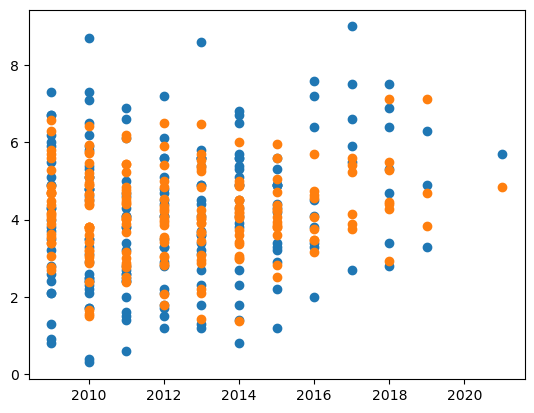

In [116]:
import matplotlib.pyplot as plt 

plt.scatter(next_war_df["Season"],next_war_df["Next_WAR"])
plt.scatter(next_war_df["Season"],next_war_df["prediction"])
plt.show()

In [103]:
import json
next_war_js=next_war_df.to_json(orient = "records")
next_war_js

'[{"IDfg":225,"Season":2009,"Name":"Mark Buehrle","WAR":3.0,"Next_WAR":3.8,"diff":0.3996835393,"prediction":3.4003164607},{"IDfg":225,"Season":2010,"Name":"Mark Buehrle","WAR":3.8,"Next_WAR":3.1,"diff":1.293167659,"prediction":4.393167659},{"IDfg":225,"Season":2011,"Name":"Mark Buehrle","WAR":3.1,"Next_WAR":1.6,"diff":1.1624631814,"prediction":2.7624631814},{"IDfg":225,"Season":2012,"Name":"Mark Buehrle","WAR":1.6,"Next_WAR":2.2,"diff":0.4036675629,"prediction":1.7963324371},{"IDfg":225,"Season":2013,"Name":"Mark Buehrle","WAR":2.2,"Next_WAR":null,"diff":1.5027367247,"prediction":2.1972632753},{"IDfg":232,"Season":2009,"Name":"Jon Garland","WAR":1.8,"Next_WAR":null,"diff":2.7283778314,"prediction":3.6283778314},{"IDfg":404,"Season":2009,"Name":"CC Sabathia","WAR":5.8,"Next_WAR":5.5,"diff":0.6385531166,"prediction":4.8614468834},{"IDfg":404,"Season":2010,"Name":"CC Sabathia","WAR":5.5,"Next_WAR":5.8,"diff":0.8499327255,"prediction":4.9500672745},{"IDfg":404,"Season":2011,"Name":"CC Saba

In [105]:
# Save JSON file in clean data file
#save_file=open('../static/data/Clean_Data/next_war.js','w')
json.dump(next_war_js, save_file, indent = 6)  
save_file.close() 

# Pitching Stats & Records Data

In [5]:
# Add an option on website for user to check the records of previous games 
from pybaseball import schedule_and_record
data_test = schedule_and_record(2017, 'NYY')
data_test.head()

http://www.baseball-reference.com/teams/NYY/2017-schedule-scores.shtml


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Sunday, Apr 2",NYY,@,TBR,L,3.0,7.0,9.0,0-1,5.0,1.0,Archer,Tanaka,Colomé,3:21,D,31042.0,1.08,-1,None
2,"Tuesday, Apr 4",NYY,@,TBR,W,5.0,0.0,9.0,1-1,3.0,0.5,Sabathia,Odorizzi,None,3:07,N,19366.0,1.05,1,None
3,"Wednesday, Apr 5",NYY,@,TBR,L,1.0,4.0,9.0,1-2,4.0,1.5,Cobb,Pineda,Colomé,3:17,N,12737.0,1.07,-1,None
4,"Friday, Apr 7",NYY,@,BAL,L,5.0,6.0,9.0,1-3,4.0,2.5,Hart,Clippard,Britton,3:20,N,25248.0,1.04,-2,None
5,"Saturday, Apr 8",NYY,@,BAL,L,4.0,5.0,9.0,1-4,4.0,3.5,Givens,Betances,Britton,3:35,D,38916.0,1.00,-3,None
